In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/mac/opt/anaconda3/lib/python3.7/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
X = df.iloc[:,1:]  #independent columns
y = df.iloc[:,0] #target column i.e koi_disposition

# Select your features (columns)

### using Extra Tree Classifier for extracting the top features for the dataset.

In [7]:
#get the importance point for top features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators =100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.13086302 0.17512663 0.1330225  0.05090514 0.01871212 0.01610612
 0.01459324 0.01174458 0.02048796 0.02351957 0.01127118 0.01102855
 0.00956772 0.01694347 0.02764393 0.02490681 0.02348625 0.01313038
 0.0123866  0.01297627 0.010946   0.00991349 0.01193957 0.00930678
 0.00877386 0.00795334 0.03147674 0.00977777 0.01062763 0.02221504
 0.01628838 0.01017536 0.00980664 0.01257865 0.00853908 0.01076553
 0.00895063 0.01149755 0.00986183 0.01018408]


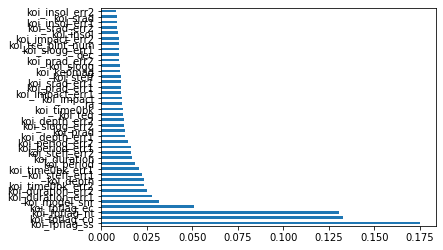

In [8]:
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X)).plot(kind='barh')
plt.show()

In [9]:
#select the features that has point higher than .02
top=feat_importances[feat_importances>0.02]
feature_importance=list(top.index)
columns=feature_importance
length=len(columns)

In [12]:
# Set features. This will also be used as your x values.
selected_features = df[columns]
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_time0bk_err1,koi_time0bk_err2,koi_duration_err1,koi_duration_err2,koi_depth,koi_model_snr,koi_steff_err1
0,0,0,0,0,0.003520,-0.003520,0.11600,-0.11600,874.8,25.8,81
1,0,1,0,0,0.000581,-0.000581,0.03410,-0.03410,10829.0,76.3,158
2,0,1,0,0,0.000115,-0.000115,0.00537,-0.00537,8079.2,505.6,157
3,0,0,0,0,0.001130,-0.001130,0.04200,-0.04200,603.3,40.9,169
4,0,0,0,0,0.001900,-0.001900,0.06730,-0.06730,686.0,40.2,189


# Create a Train Test Split

Use `koi_disposition` for the y values

In [13]:
X = selected_features
y = df['koi_disposition']

In [14]:
#X and y shape
X.shape,y.shape

((6991, 11), (6991,))

In [15]:
#transform the y value to int as label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y_label=list(le.transform(y)) # 0, 1, 2

In [16]:
#divide train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_label, test_size=0.25, shuffle = True,random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [17]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Train and Test the Models

In [19]:
#create result dict to store the results from different methods
result_dict={}

### Neural Network

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=length))
model.add(Dense(units=3, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 0s - loss: 0.8435 - accuracy: 0.6460
Epoch 2/100
164/164 - 0s - loss: 0.5581 - accuracy: 0.8167
Epoch 3/100
164/164 - 0s - loss: 0.4266 - accuracy: 0.8446
Epoch 4/100
164/164 - 0s - loss: 0.3716 - accuracy: 0.8514
Epoch 5/100
164/164 - 0s - loss: 0.3455 - accuracy: 0.8529
Epoch 6/100
164/164 - 0s - loss: 0.3318 - accuracy: 0.8566
Epoch 7/100
164/164 - 0s - loss: 0.3239 - accuracy: 0.8562
Epoch 8/100
164/164 - 0s - loss: 0.3185 - accuracy: 0.8575
Epoch 9/100
164/164 - 0s - loss: 0.3155 - accuracy: 0.8577
Epoch 10/100
164/164 - 0s - loss: 0.3127 - accuracy: 0.8589
Epoch 11/100
164/164 - 0s - loss: 0.3112 - accuracy: 0.8583
Epoch 12/100
164/164 - 0s - loss: 0.3096 - accuracy: 0.8591
Epoch 13/100
164/164 - 0s - loss: 0.3089 - accuracy: 0.8583
Epoch 14/100
164/164 - 0s - loss: 0.3076 - accuracy: 0.8604
Epoch 15/100
164/164 - 0s - loss: 0.3071 - accuracy: 0.8583
Epoch 16/100
164/164 - 0s - loss: 0.3068 - accuracy: 0.8579
Epoch 17/100
164/164 - 0s - loss: 0.3059 - accura

In [25]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
result_dict.update({'Normal Neural Network':model_accuracy})

55/55 - 0s - loss: 0.3122 - accuracy: 0.8587
Normal Neural Network - Loss: 0.31223589181900024, Accuracy: 0.8586956262588501


### Multiple Layers Neural Network

In [27]:
model2 = Sequential()
model2.add(Dense(units=16, activation='relu', input_dim=length))
model2.add(Dense(units=8, activation='relu'))
model2.add(Dense(units=3, activation='softmax'))

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Fit the model to the training data
model2.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 0s - loss: 0.7552 - accuracy: 0.7234
Epoch 2/100
164/164 - 0s - loss: 0.4217 - accuracy: 0.8301
Epoch 3/100
164/164 - 0s - loss: 0.3418 - accuracy: 0.8516
Epoch 4/100
164/164 - 0s - loss: 0.3178 - accuracy: 0.8562
Epoch 5/100
164/164 - 0s - loss: 0.3091 - accuracy: 0.8606
Epoch 6/100
164/164 - 0s - loss: 0.3056 - accuracy: 0.8604
Epoch 7/100
164/164 - 0s - loss: 0.3045 - accuracy: 0.8587
Epoch 8/100
164/164 - 0s - loss: 0.3025 - accuracy: 0.8623
Epoch 9/100
164/164 - 0s - loss: 0.3016 - accuracy: 0.8598
Epoch 10/100
164/164 - 0s - loss: 0.3008 - accuracy: 0.8606
Epoch 11/100
164/164 - 0s - loss: 0.3005 - accuracy: 0.8581
Epoch 12/100
164/164 - 0s - loss: 0.3004 - accuracy: 0.8621
Epoch 13/100
164/164 - 0s - loss: 0.2987 - accuracy: 0.8623
Epoch 14/100
164/164 - 0s - loss: 0.2982 - accuracy: 0.8606
Epoch 15/100
164/164 - 0s - loss: 0.2981 - accuracy: 0.8600
Epoch 16/100
164/164 - 0s - loss: 0.2976 - accuracy: 0.8640
Epoch 17/100
164/164 - 0s - loss: 0.2977 - accura

In [31]:
#print and store result
model_loss, model_accuracy = model2.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Mutiple Layers Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
result_dict.update({'Mutiple Layers Neural Network':model_accuracy})

55/55 - 0s - loss: 0.3085 - accuracy: 0.8610
Mutiple Layers Neural Network - Loss: 0.30845195055007935, Accuracy: 0.8609839677810669


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='auto',solver='newton-cg')
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#print and store result
print("Accuracy of LogisticRegression Classifier: ", lr.score(X_test_scaled, y_test))
result_dict.update({'LogisticRegression Classifier':lr.score(X_test_scaled, y_test)})

Accuracy of LogisticRegression Classifier:  0.8604118993135011


### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train_scaled, y_train)
y_predict = knc.predict(X_test_scaled)

In [37]:
#print and store result
print("The Accuracy of K-Nearest Neighbor Classifier: ", knc.score(X_test_scaled, y_test))
result_dict.update({'K-Nearest Neighbor Classifier':knc.score(X_test_scaled, y_test)})

The Accuracy of K-Nearest Neighbor Classifier:  0.8386727688787186


### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
y_predict = dtc.predict(X_test_scaled)

In [40]:
#print and store result
print("The Accuracy of Decision Tree Classifier:  ",dtc.score(X_test_scaled, y_test))
result_dict.update({'Decision Tree Classifier':dtc.score(X_test_scaled, y_test)})

The Accuracy of Decision Tree Classifier:   0.8443935926773455


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=100)
rdf.fit(X_train_scaled, y_train)
y_predict = rdf.predict(X_test_scaled)

In [43]:
#print and store result
print("The Accuracy of Random Forest Classifier:  ",metrics.accuracy_score(y_test, y_predict))
result_dict.update({'Random Forest Classifier':metrics.accuracy_score(y_test, y_predict)})

The Accuracy of Random Forest Classifier:   0.8787185354691075


### Show Results

In [44]:
result_df=pd.DataFrame({'method':list(result_dict.keys()),'accuracy':list(result_dict.values())})
result_df.sort_values('accuracy',ascending=False)

,method,accuracy
5,Random Forest Classifier,0.878719
1,Mutiple Layers Neural Network,0.860984
2,LogisticRegression Classifier,0.860412
0,Normal Neural Network,0.858696
4,Decision Tree Classifier,0.844394
3,K-Nearest Neighbor Classifier,0.838673


### Hyperparameter tuning on random forest classifiser since it has the best accuracy

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [53]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV


#making the instance
model = RandomForestClassifier()
#Hyper Parameters Set
params = {'n_estimators':[50,100],
          'criterion':['gini', 'entropy'],
          'max_depth':[2,3,4,5,6,7,8,9],
          'min_samples_split':[2,3,4,5,6],
          'max_features':['auto', 'sqrt', 'log2'],
          'class_weight':['balanced', 'balanced_subsample'],
          'n_jobs':[1]}

In [54]:
# Train the model with GridSearch
#Making models with hyper parameters sets
grid = GridSearchCV(model, param_grid=params, verbose=3)

#Training
grid.fit(X_train_scaled,y_train)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Fitting 3 folds for each of 960 candidates, totalling 2880 fits
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.879, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.857, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.847, total=   0.2s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimator

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s



[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.877, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.871, total=   0.5s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.848, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.878, total=   0.1s
[CV] class_wei

[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.879, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.869, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.849, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.878, total=   0.1s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.877, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.858, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.840, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.872, total=   0.1s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.874, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.864, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.849, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.878, total=   0.1s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.877, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.874, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.848, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.877, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.872, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.871, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.850, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.877, total=   0.1s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.880, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.874, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.853, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.874, total=   0.1s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.878, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.874, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.852, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.875, total=   0.1s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.878, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.877, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.855, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.879, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.885, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.884, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.859, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.886, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.889, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.882, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.862, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.886, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.882, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.883, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.861, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.887, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.886, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.886, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.865, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.887, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.889, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.886, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.864, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.891, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.889, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.884, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.864, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.887, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.887, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.888, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.863, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.890, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.889, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.887, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.864, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.890, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.890, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.887, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.865, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.890, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.890, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.890, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.865, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.888, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.892, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.888, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.865, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.889, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.891, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.890, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.867, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.891, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.894, total=   0.5s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.891, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.865, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.893, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.895, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.889, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.865, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.895, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.894, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.890, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.863, total=   0.4s
[CV] class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.895, total=   0.2s
[CV] class_weig

[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.880, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.871, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.849, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.879, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.882, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.870, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.840, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.876, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.879, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.868, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.844, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.880, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.879, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.870, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.853, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.874, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.877, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.870, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.853, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.880, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.881, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.872, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.854, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.873, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.883, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.872, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.857, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.890, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.877, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.872, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.853, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.875, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.881, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.882, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.855, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.878, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.862, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.885, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.878, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.863, total= 

[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.880, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.867, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.889, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.880, total=   

[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.880, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.865, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.884, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.883, total=   

[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.887, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.883, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.866, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.890, total=   0.

[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.866, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.887, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.882, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.866, total=   0.2

[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.884, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.865, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.888, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.885, total=   0

[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.891, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.887, total=   0.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.867, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.889, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.868, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.889, total=   0.8s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.890, total=   0.8s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.864, total= 

[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.885, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.864, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.891, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.888, total=   

[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.892, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.886, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.868, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.887, total=   0.

[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.867, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.891, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.889, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.869, total=   0.3

[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.889, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.868, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.891, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.886, total=   0

[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.890, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.888, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.867, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.892, total=  

[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.869, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.891, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.888, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.868, total= 

[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.886, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.868, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.891, total=   0.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.887, total=   

[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.893, total=   0.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.891, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.868, total=   0.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.893, total=   0.

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.837, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.875, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.869, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=auto, min_samples_split=5, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.876, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.871, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.848, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=5,

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.869, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.753, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.877, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, min_samples_split=4, n

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.850, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.877, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.872, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=4, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.877, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.870, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.850, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=4,

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.874, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.848, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.875, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, n

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.854, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.876, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.870, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.877, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.871, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.855, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3,

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.871, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.852, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.878, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, min_samples_split=2, n

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.852, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.887, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.883, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.881, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.885, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.862, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2,

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.883, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.863, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.885, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=6, n

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.864, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.877, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.882, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=log2, min_samples_split=6, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.889, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.884, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.863, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=auto, min_samples_split=6,

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.887, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.867, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.886, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=5, n

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.864, total=   0.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.886, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.886, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, min_samples_split=5, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.889, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.885, total=   0.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.865, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=5,

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.884, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.868, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.888, total=   0.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=4, n

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.864, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.889, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.884, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=log2, min_samples_split=4, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.890, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.890, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.868, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4,

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.888, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.866, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.890, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, n

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.865, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.891, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.886, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, min_samples_split=3, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.893, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.892, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.865, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=auto, min_samples_split=3,

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.890, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.867, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.893, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2, n

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.868, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.893, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.889, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=2, n_e

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.893, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.889, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=9, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.864, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, min_samples_sp

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.867, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.826, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.881, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=auto, m

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.855, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.883, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.863, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqrt, min

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.879, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.865, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.849, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.871, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.855, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.878, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, m

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.856, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.878, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.871, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=sqrt, min

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.879, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.871, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.852, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=log2,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.879, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.859, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.881, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=auto, m

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.862, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.877, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.874, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=sqrt, min

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.877, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.875, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.856, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=4, max_features=log2,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.875, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.865, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.882, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, m

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.860, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.875, total=   0.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.882, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, min

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.887, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.883, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.866, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=log2,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.887, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.867, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1, score=0.888, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=auto, m

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.867, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.889, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1, score=0.882, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.890, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.885, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.865, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.885, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.867, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1, score=0.891, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, m

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.868, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.892, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1, score=0.884, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.889, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.888, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.865, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.887, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.867, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1, score=0.891, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=log2, min_samples_split=5, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=log2, m

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.868, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.892, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1, score=0.887, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=auto, min

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.893, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.888, total=   0.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.868, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=5, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.888, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.869, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1, score=0.889, total=   0.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=log2, min_samples_split=4, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=log2, m

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.870, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.890, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1, score=0.888, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=auto, min

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.894, total=   0.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.890, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.869, total=   0.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=sqrt,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.886, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=3, n_estimators=50, n_jobs=1, score=0.867, total=   0.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1, score=0.894, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=log2, min_samples_split=3, n_estimators=100, n_jobs=1 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=9, max_features=log2, m

[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 16.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=...
                                              warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced', '

In [55]:
#The best hyper parameters set
print("Best Parameters:\n",grid.best_params_)
#Prediction
prediction=grid.predict(X_test_scaled)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",grid.best_score_)

Best Parameters:
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': 1}
Accuracy: 0.8859431623116536


# Save the Model

In [56]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'willy.sav'
joblib.dump(grid, filename)

['willy.sav']

In [57]:
#check if the model saved and check the test score
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_scaled,y_test)
print(result)

0.88558352402746
